In [4]:
import pandas as pd
import numpy as np
import io
import os
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
#data_root= "ml-100k/"

In [9]:
columns = ['user_id','item_id','rating','timestamp']
#datafile = os.path.join(data_root,'u.data')
#data = pd.read_csv(datafile,sep='\t', names=columns)
data = pd.read_csv("u.data",sep='\t', names=columns)
data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [10]:
n_users = data.user_id.unique().size
n_items = data.item_id.unique().size

n_users, n_items

(943, 1682)

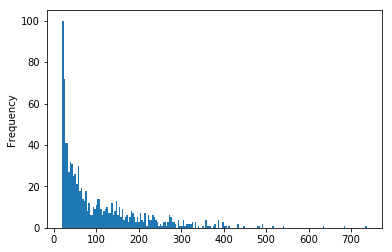

In [15]:
data.groupby('user_id').count()['item_id'].plot(kind='hist', bins= 200)

CDF - Cumulative distribution function

/Users/ione/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


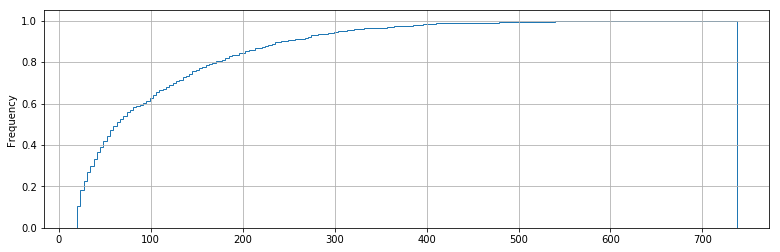

In [18]:
data.groupby('user_id').count()['item_id'].plot(kind='hist', bins= 200, normed = 1, histtype = 'step', cumulative = True, figsize = (13,4), grid=True )

In [ ]:
Mirar lo de 

In [22]:
#items_id_file = os.path.join(data_root, "u.item")
items_id_file = os.path.join( "u.item")
!head $items_id_file
 
# Create a dictionary for movie titles and ids
item_dict = {}
with io.open(items_id_file, 'r', encoding='ISO-8859-1') as f:
    for line in f.readlines():
        record = line.split('|')
        item_dict[int(record[0])] = str(record[1])
 
# We can use this dict to see the films a user has seen, for instance.
for record in data.values[:20]:
    print("User {u} viewed '{m}' and gave a {r} rating".format(u=record[0], m=item_dict[record[1]], r=record[2]))    
 
# Define a function that retrieves all the ids and titles for movies containing 'text' in its title
def returnItemId(text, ids):
    """
   :param text: string to be looked for in movies titles
   :param ids: dicttionary of {id:title}
   
   :return: a list of (id,title) if text found in titles, and an empty list otherwise.
   """
    search = [(k, v.lower().find(text.lower())) for k, v in list(ids.items())]
    index = [k for k, v in search if v>-1]
   
    return zip(index, [ids[i] for i in index]) if len(index)>0 else []

1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0
2|GoldenEye (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?GoldenEye%20(1995)|0|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0
3|Four Rooms (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0
4|Get Shorty (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995)|0|1|0|0|0|1|0|0|1|0|0|0|0|0|0|0|0|0|0
5|Copycat (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Copycat%20(1995)|0|0|0|0|0|0|1|0|1|0|0|0|0|0|0|0|1|0|0
6|Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)|01-Jan-1995||http://us.imdb.com/Title?Yao+a+yao+yao+dao+waipo+qiao+(1995)|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|0|0|0|0
7|Twelve Monkeys (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Twelve%20Monkeys%20(1995)|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|1|0|0|0
8|Babe (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Babe%20(1995)|0|0|0|0|1

In [21]:
items_id_file = os.path.join("u.item")
!head $items_id_file

1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0
2|GoldenEye (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?GoldenEye%20(1995)|0|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0
3|Four Rooms (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0
4|Get Shorty (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995)|0|1|0|0|0|1|0|0|1|0|0|0|0|0|0|0|0|0|0
5|Copycat (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Copycat%20(1995)|0|0|0|0|0|0|1|0|1|0|0|0|0|0|0|0|1|0|0
6|Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)|01-Jan-1995||http://us.imdb.com/Title?Yao+a+yao+yao+dao+waipo+qiao+(1995)|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|0|0|0|0
7|Twelve Monkeys (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Twelve%20Monkeys%20(1995)|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|1|0|0|0
8|Babe (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Babe%20(1995)|0|0|0|0|1

In [23]:
# Create a dictionary for movie titles and ids
item_dict = {}
with io.open(items_id_file, 'r', encoding='ISO-8859-1') as f:
    for line in f.readlines():
        record = line.split('|')
        item_dict[int(record[0])] = str(record[1])
 
# We can use this dict to see the films a user has seen, for instance.
for record in data.values[:20]:
    print("User {u} viewed '{m}' and gave a {r} rating".format(u=record[0], m=item_dict[record[1]], r=record[2]))  

User 196 viewed 'Kolya (1996)' and gave a 3 rating
User 186 viewed 'L.A. Confidential (1997)' and gave a 3 rating
User 22 viewed 'Heavyweights (1994)' and gave a 1 rating
User 244 viewed 'Legends of the Fall (1994)' and gave a 2 rating
User 166 viewed 'Jackie Brown (1997)' and gave a 1 rating
User 298 viewed 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)' and gave a 4 rating
User 115 viewed 'Hunt for Red October, The (1990)' and gave a 2 rating
User 253 viewed 'Jungle Book, The (1994)' and gave a 5 rating
User 305 viewed 'Grease (1978)' and gave a 3 rating
User 6 viewed 'Remains of the Day, The (1993)' and gave a 3 rating
User 62 viewed 'Men in Black (1997)' and gave a 2 rating
User 286 viewed 'Romy and Michele's High School Reunion (1997)' and gave a 5 rating
User 200 viewed 'Star Trek: First Contact (1996)' and gave a 5 rating
User 210 viewed 'To Wong Foo, Thanks for Everything! Julie Newmar (1995)' and gave a 3 rating
User 224 viewed 'Batman Forever (19

In [24]:
# Define a function that retrieves all the ids and titles for movies containing 'text' in its title
def returnItemId(text, ids):
    """
   :param text: string to be looked for in movies titles
   :param ids: dicttionary of {id:title}
   
   :return: a list of (id,title) if text found in titles, and an empty list otherwise.
   """
    search = [(k, v.lower().find(text.lower())) for k, v in list(ids.items())]
    index = [k for k, v in search if v>-1]
   
    return zip(index, [ids[i] for i in index]) if len(index)>0 else []

In [25]:
[x for x in returnItemId('but',item_dict)]

[(240, 'Beavis and Butt-head Do America (1996)'),
 (435, 'Butch Cassidy and the Sundance Kid (1969)'),
 (580, 'Englishman Who Went Up a Hill, But Came Down a Mountain, The (1995)'),
 (1401, 'M. Butterfly (1993)'),
 (1459, 'Madame Butterfly (1995)'),
 (1614, 'Reluctant Debutante, The (1958)'),
 (1621, 'Butterfly Kiss (1995)'),
 (1645, 'Butcher Boy, The (1998)'),
 (1650, 'Butcher Boy, The (1998)')]

In [28]:
print(len(set(item_dict.keys())), len(set(item_dict.values())))

1682 1664


In [29]:
duplicates_item_dict = {}
i=0
for k,v in list(item_dict.items()):
    duplicates_item_dict[v] = [k] if v not in duplicates_item_dict else duplicates_item_dict[v]+[k]
    
#show hte duplicated titles
for k,v in list(duplicates_item_dict.items()):
    if len(v)>1:
        print(k,v)

Chasing Amy (1997) [246, 268]
Kull the Conqueror (1997) [266, 680]
Ulee's Gold (1997) [297, 303]
Fly Away Home (1996) [304, 500]
Ice Storm, The (1997) [305, 865]
Deceiver (1997) [309, 1606]
Desperate Measures (1998) [329, 348]
Body Snatchers (1993) [573, 670]
Substance of Fire, The (1996) [711, 1658]
Money Talks (1997) [876, 881]
That Darn Cat! (1997) [878, 1003]
Hugo Pool (1997) [1175, 1617]
Chairman of the Board (1998) [1234, 1654]
Designated Mourner, The (1997) [1256, 1257]
Hurricane Streets (1998) [1395, 1607]
Sliding Doors (1998) [1429, 1680]
Nightwatch (1997) [1477, 1625]
Butcher Boy, The (1998) [1645, 1650]


In [30]:
unique_id_item_dict = {v:k for k,value_list in enumerate(list(duplicates_item_dict.values()))
                      for v in value_list}
unique_id_item_dict

{1: 0,
 2: 1,
 3: 2,
 4: 3,
 5: 4,
 6: 5,
 7: 6,
 8: 7,
 9: 8,
 10: 9,
 11: 10,
 12: 11,
 13: 12,
 14: 13,
 15: 14,
 16: 15,
 17: 16,
 18: 17,
 19: 18,
 20: 19,
 21: 20,
 22: 21,
 23: 22,
 24: 23,
 25: 24,
 26: 25,
 27: 26,
 28: 27,
 29: 28,
 30: 29,
 31: 30,
 32: 31,
 33: 32,
 34: 33,
 35: 34,
 36: 35,
 37: 36,
 38: 37,
 39: 38,
 40: 39,
 41: 40,
 42: 41,
 43: 42,
 44: 43,
 45: 44,
 46: 45,
 47: 46,
 48: 47,
 49: 48,
 50: 49,
 51: 50,
 52: 51,
 53: 52,
 54: 53,
 55: 54,
 56: 55,
 57: 56,
 58: 57,
 59: 58,
 60: 59,
 61: 60,
 62: 61,
 63: 62,
 64: 63,
 65: 64,
 66: 65,
 67: 66,
 68: 67,
 69: 68,
 70: 69,
 71: 70,
 72: 71,
 73: 72,
 74: 73,
 75: 74,
 76: 75,
 77: 76,
 78: 77,
 79: 78,
 80: 79,
 81: 80,
 82: 81,
 83: 82,
 84: 83,
 85: 84,
 86: 85,
 87: 86,
 88: 87,
 89: 88,
 90: 89,
 91: 90,
 92: 91,
 93: 92,
 94: 93,
 95: 94,
 96: 95,
 97: 96,
 98: 97,
 99: 98,
 100: 99,
 101: 100,
 102: 101,
 103: 102,
 104: 103,
 105: 104,
 106: 105,
 107: 106,
 108: 107,
 109: 108,
 110: 109,
 111: 11

In [34]:
unique_item_dict = {unique_id_item_dict[k]:v for k,v in list(item_dict.items())}
assert(len(set(unique_item_dict.keys())) == len(set(unique_item_dict.values())))
 
 
[x for x in returnItemId('but', item_dict)]

[(240, 'Beavis and Butt-head Do America (1996)'),
 (435, 'Butch Cassidy and the Sundance Kid (1969)'),
 (580, 'Englishman Who Went Up a Hill, But Came Down a Mountain, The (1995)'),
 (1401, 'M. Butterfly (1993)'),
 (1459, 'Madame Butterfly (1995)'),
 (1614, 'Reluctant Debutante, The (1958)'),
 (1621, 'Butterfly Kiss (1995)'),
 (1645, 'Butcher Boy, The (1998)'),
 (1650, 'Butcher Boy, The (1998)')]

In [35]:
[x for x in returnItemId('but', unique_item_dict)]


[(239, 'Beavis and Butt-head Do America (1996)'),
 (431, 'Butch Cassidy and the Sundance Kid (1969)'),
 (575, 'Englishman Who Went Up a Hill, But Came Down a Mountain, The (1995)'),
 (1390, 'M. Butterfly (1993)'),
 (1448, 'Madame Butterfly (1995)'),
 (1601, 'Reluctant Debutante, The (1958)'),
 (1607, 'Butterfly Kiss (1995)'),
 (1630, 'Butcher Boy, The (1998)')]

In [36]:
trainfile = os.path.join('ua.base')
!head $trainfile

1	1	5	874965758
1	2	3	876893171
1	3	4	878542960
1	4	3	876893119
1	5	3	889751712
1	6	5	887431973
1	7	4	875071561
1	8	1	875072484
1	9	5	878543541
1	10	3	875693118


In [38]:
columns = ['user_id', 'item_id', 'rating', 'timestamp']
trainfile = os.path.join("ua.base")
train = pd.read_csv(trainfile, sep='\t', names=columns)
print('There are %s users, %s itmes and %s pairs in the train set' \
      %(train.user_id.unique().shape[0], train.item_id.unique().shape[0], train.shape[0]))
train.head()

There are 943 users, 1680 itmes and 90570 pairs in the train set


,user_id,item_id,rating,timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


In [39]:
columns = ['user_id', 'item_id', 'rating', 'timestamp']
testfile = os.path.join( "ua.test")
test = pd.read_csv(testfile, sep='\t', names=columns)
print('There are %s users, %s itmes and %s pairs in the test set' \
      %(test.user_id.unique().shape[0], test.item_id.unique().shape[0], test.shape[0]))
test.head()

There are 943 users, 1129 itmes and 9430 pairs in the test set


,user_id,item_id,rating,timestamp
0,1,20,4,887431883
1,1,33,4,878542699
2,1,61,4,878542420
3,1,117,3,874965739
4,1,155,2,878542201


In [40]:
train['item_id'] = train['item_id'].apply(lambda id: unique_id_item_dict[id])
print('Now there are %s unique items in train set' % train.item_id.unique().shape[0])
 

Now there are 1662 unique items in traint set


In [41]:
test['item_id'] = test['item_id'].apply(lambda id: unique_id_item_dict[id])
print('Now there are %s unique items in test set' % test.item_id.unique().shape[0])

Now there are 1119 unique items in test set


/Users/ione/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


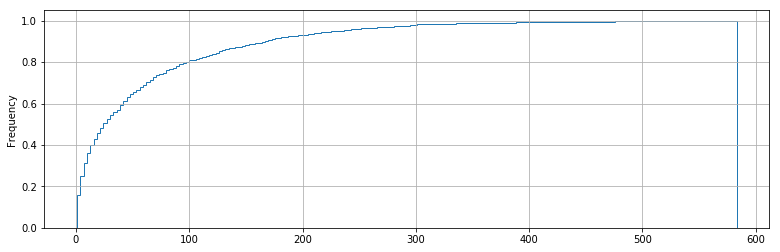

In [43]:
data.groupby('item_id').count()['user_id'].plot(kind='hist', bins= 200, normed = 1, histtype = 'step', cumulative = True, figsize = (13,4), grid=True )

El 80% de las pelis tienen menos de 100 valoraciones. Unas pocas tienen muchas,es un caso de long tail 

/Users/ione/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


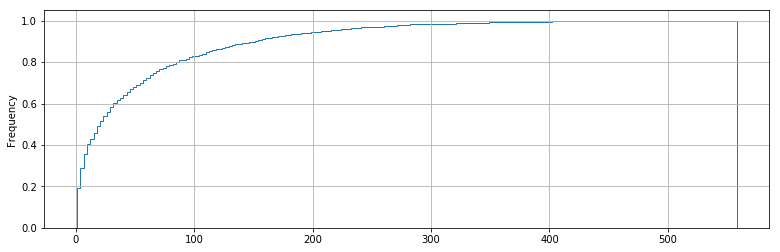

In [44]:
data[data.rating >2 ].groupby('item_id').count()['user_id'].plot(kind='hist', bins= 200, normed = 1, histtype = 'step', cumulative = True, figsize = (13,4), grid=True )

In [45]:
mostRated=train.groupby('item_id')['user_id'].count().sort_values(ascending=False)

In [48]:
mostRatedMovies= np.array([np.array([i,unique_item_dict[i], mostRated[i]],dtype=np.object)
                          for i in mostRated.index])
mostRatedMovies[:10,1:]

array([['Star Wars (1977)', 495],
       ['Fargo (1996)', 443],
       ['Return of the Jedi (1983)', 439],
       ['Contact (1997)', 412],
       ['English Patient, The (1996)', 400],
       ['Liar Liar (1997)', 398],
       ['Toy Story (1995)', 392],
       ['Scream (1996)', 386],
       ['Independence Day (ID4) (1996)', 384],
       ['Raiders of the Lost Ark (1981)', 379]], dtype=object)

In [50]:
positiveRated = train[train.rating>= 4.0].groupby('item_id')['user_id'].count().sort_values(ascending=False)

In [55]:
positiveRatedMovies = np.array([np.array([i,unique_item_dict[i], positiveRated[i]],dtype=np.object)
                          for i in positiveRated.index])
positiveRatedMovies[:10,1:]

array([['Star Wars (1977)', 428],
       ['Fargo (1996)', 354],
       ['Return of the Jedi (1983)', 331],
       ['Raiders of the Lost Ark (1981)', 316],
       ['Silence of the Lambs, The (1991)', 310],
       ['Godfather, The (1972)', 298],
       ['Contact (1997)', 276],
       ['Toy Story (1995)', 275],
       ['Empire Strikes Back, The (1980)', 264],
       ['Pulp Fiction (1994)', 262]], dtype=object)

In [53]:
negativeRated = train[train.rating <=2.0].groupby('item_id')['user_id'].count().sort_values(ascending=False)

In [56]:
negativeRatedMovies = np.array([np.array([i,unique_item_dict[i], negativeRated[i]],dtype=np.object)
                          for i in negativeRated.index])
negativeRatedMovies[:10,1:]

array([['Liar Liar (1997)', 102],
       ['Independence Day (ID4) (1996)', 85],
       ['Saint, The (1997)', 77],
       ['Evita (1996)', 75],
       ['Twister (1996)', 72],
       ['Mars Attacks! (1996)', 71],
       ['Volcano (1997)', 69],
       ["Dante's Peak (1997)", 65],
       ['Scream (1996)', 64],
       ['Broken Arrow (1996)', 63]], dtype=object)

In [57]:
min_ratings = 50
listRatedMovies = train.groupby('item_id')['rating'].apply(list).reset_index()

In [58]:
listRatedMovies

,item_id,rating
0,0,"[5, 4, 4, 4, 3, 1, 5, 5, 3, 5, 5, 5, 3, 5, 4, ..."
1,1,"[3, 3, 2, 3, 5, 1, 3, 3, 4, 4, 3, 2, 2, 3, 4, ..."
2,2,"[4, 2, 3, 4, 3, 2, 2, 1, 3, 3, 5, 3, 3, 3, 2, ..."
3,3,"[3, 5, 4, 5, 5, 5, 3, 5, 4, 2, 4, 4, 3, 3, 2, ..."
4,4,"[3, 1, 2, 3, 4, 4, 4, 3, 3, 2, 4, 3, 3, 4, 3, ..."
5,5,"[5, 5, 3, 3, 5, 4, 4, 1, 2, 4, 4, 5, 2, 3, 5, ..."
6,6,"[4, 2, 5, 3, 4, 2, 5, 1, 5, 4, 5, 4, 4, 4, 3, ..."
7,7,"[1, 4, 5, 4, 4, 5, 5, 4, 5, 4, 4, 3, 4, 4, 3, ..."
8,8,"[5, 4, 5, 4, 5, 3, 4, 4, 5, 5, 5, 5, 4, 4, 3, ..."
9,9,"[3, 2, 4, 3, 4, 4, 5, 5, 4, 5, 2, 5, 4, 2, 5, ..."


In [88]:
meanMovies = filteredListRatedMovies.rating.apply(lambda x: np.mean(np.array(x))).sort_values(ascending=False)


NameError: name 'filteredListRatedMovies' is not defined

#meanRatedMovies = np.array([np.array([i,unique_item_dict[i], meanRated[i]],dtype=np.object)
                          for i in negativeRated.index])
#meanRatedMovies[:10,1:]

Best way to test if a recommendation system is good:
#Online - Test A/B
#Offline - 

#Siempre incluir un baseline

Metricas;
Difference between MSE and MAE, RMSE - mirar diferencia



METRICAS - 30/03/2019

In [60]:
def se(seen,recommended):
    return (np.array(seen) - np.array(recommended))**2
def mse(seen,recommended):
    return np.mean(se(seen, recommended))
def rmse(seen,recommended):
    return np.mean(np.sqrt(se(seen, recommended)))
def mae(seen,recommended):
    return np.mean(np.abs(np.array(seen) - np.array(recommended)))


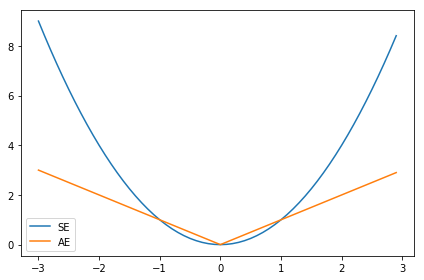

In [62]:
fig, ax = plt.subplots(1,1)
x= np.arange(-3,3,.1)
ax.plot(x, x**2,label ='SE')
ax.plot(x, np.abs(x), label = 'AE')
ax.legend()
plt.tight_layout()

In [ ]:
Square error - para errores pequenos va bien, pero con errores grandes se va.Cuidado.
Absolute error - para errores pequenos no es tan preciso
Se podria definir un hibrido


In [66]:
def hibrido(discr):
    if np.abs(discr) <= 1:
        return np.abs(discr)
    return (discr) **2

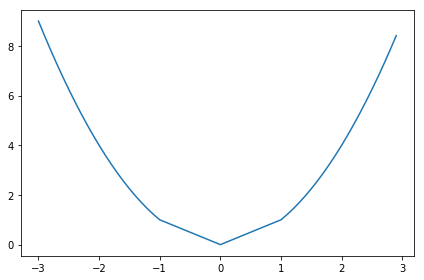

In [67]:
fig, ax = plt.subplots(1,1)
x= np.arange(-3,3,.1)
ax.plot(x, [hibrido(x_)for x_ in x], label ="hib")

plt.tight_layout()

In [72]:
def precision_at_n(N,seen,recommended):
    return len(set(seen).intersection(set(recommended[:N])))/N

El minimo en el denom porque si le doy 2 opciones solo, deberia dividir por 2. Si he visto 3, divido por 3 a no ser que el usuario ve solo 2, entonces coge 2

In [77]:
def recall_at_n(N, seen,recommended):
    return len(set(seen).intersection(set(recommended[:N])))/min(len(seen), N)

In [78]:
recall_at_n(2,[1,2,3,4,5],[3,4])

1.0

In [79]:
TestUsersGrouped = test[test.rating>= 4.0].groupby('user_id')['item_id'].apply(list)

Baseline de las pelis mas votadas

In [83]:
topN = 30
np.mean(TestUsersGrouped.apply(lambda seen: recall_at_n(topN, seen, mostRatedMovies[:,0])).values)

0.19063424084837358

In [84]:
np.mean(TestUsersGrouped.apply(lambda seen: recall_at_n(topN, seen, positiveRatedMovies[:,0])).values)

0.18696551782740217

In [85]:
np.mean(TestUsersGrouped.apply(lambda seen: recall_at_n(topN, seen, meanRatedMovies[:,0])).values)

NameError: name 'meanRatedMovies' is not defined

In [86]:
np.mean(TestUsersGrouped.apply(lambda seen: precision_at_n(topN, seen, mostRatedMovies[:,0])).values)

0.03636688079942898

In [87]:
np.mean(TestUsersGrouped.apply(lambda seen: precision_at_n(topN, seen, positiveRatedMovies[:,0])).values)

0.03522483940042826

Important: metricas offline no son demasiado fiables. Siempre las online son mas importantes. Deberian ser orientativas

Precision y recall no evaluan el orden de aparicion de la recomendacion. For example, google wants the most probable recomenndations to appear top of the page.


Mean average precision - MAP ( Tambien se llama AP at N)

In [90]:
def apk(actual, predicted, k=10):
    predicted = predicted[:k] # top-k predictions
   
    score = 0.0 # This will store the numerator
    num_hits = 0.0 # This will store the sum of rel(i)
 # and p not in predicted[:i]: --> no se ha recommendado anteriormente
    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
#dividimos por la posicion de i + 1, denominador va creciendo, el score ira decreciendo a medida que sube k. 
#Penaliza el orden

            score += num_hits / (i+1.0)
 #
    return score / min(len(actual), k)

[1.0, 0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091]


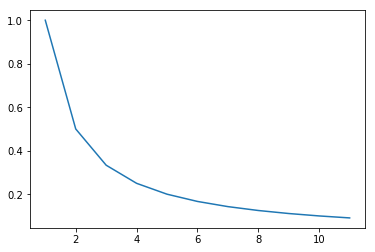

In [91]:
zzz = []
for i in range(11):
    zzz.append(1/(i+1.))
print(zzz)

plt.plot(range(1,12),zzz)

Para feedback inplicito: precision- recall & MAP

## Collaborative Filtering

In [96]:
# create a dictionary of movies per user
moviesPerUser = train[train.rating>=4.0].groupby('user_id')['item_id'].apply(np.array).to_dict()
 
# calculate the number of items in train
n_items = len(unique_item_dict.keys())
 
# co-ocurrance matrix will have shape=[n_items,n_items]
coMatrix = np.zeros((n_items, n_items)) # co-occurrence matrix
for user,movies in moviesPerUser.items():
    for m in movies:
        # update 1 row at a time
        coMatrix[m,movies] = coMatrix[m,movies] + 1
        

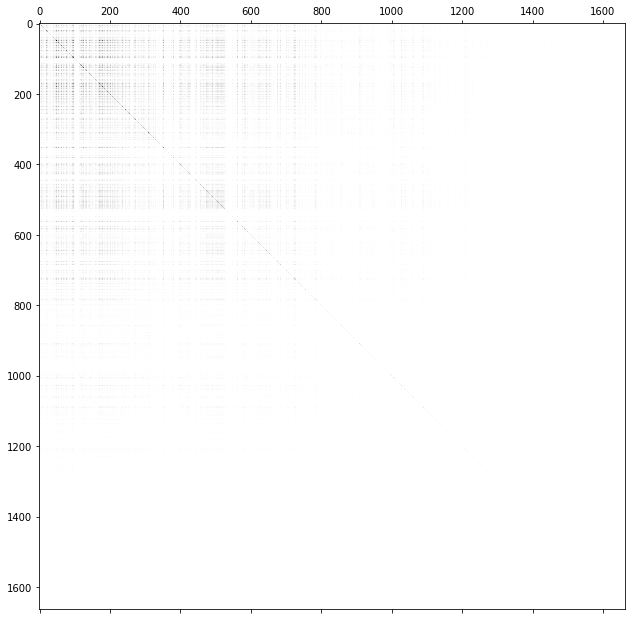

In [97]:
# visualize the matrix
plt.matshow(coMatrix, fignum=1000, cmap=plt.cm.binary)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

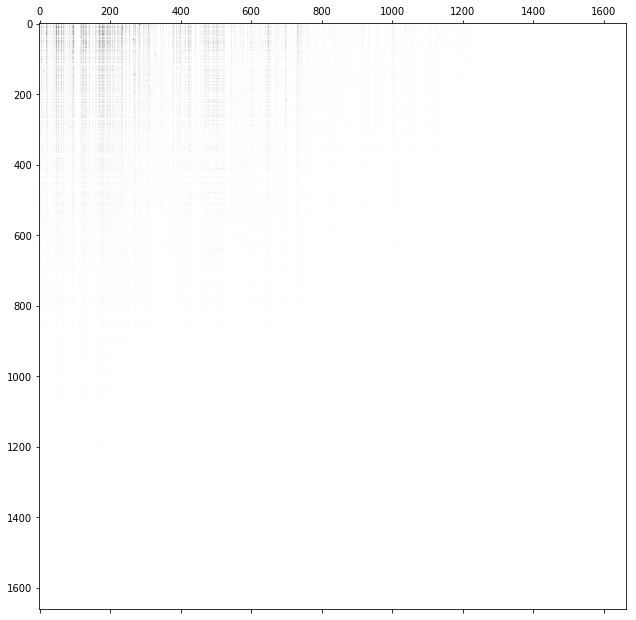

In [99]:
popular_indexing = mostRatedMovies[:,0].astype(np.int)
plt.matshow(coMatrix[popular_indexing, :], fignum=1000, cmap=plt.cm.binary)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

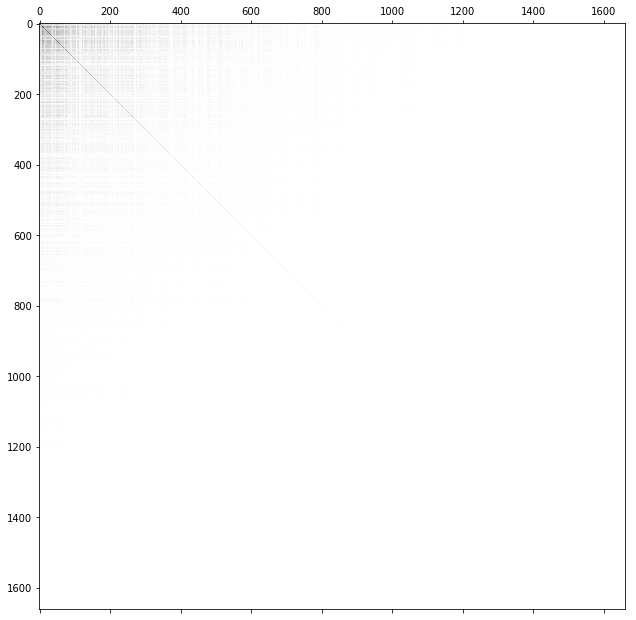

In [100]:
popular_indexing = mostRatedMovies[:,0].astype(np.int)
coMatrix_sorted = coMatrix[popular_indexing, :]
plt.matshow(coMatrix_sorted[:,popular_indexing], fignum=1000, cmap=plt.cm.binary)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

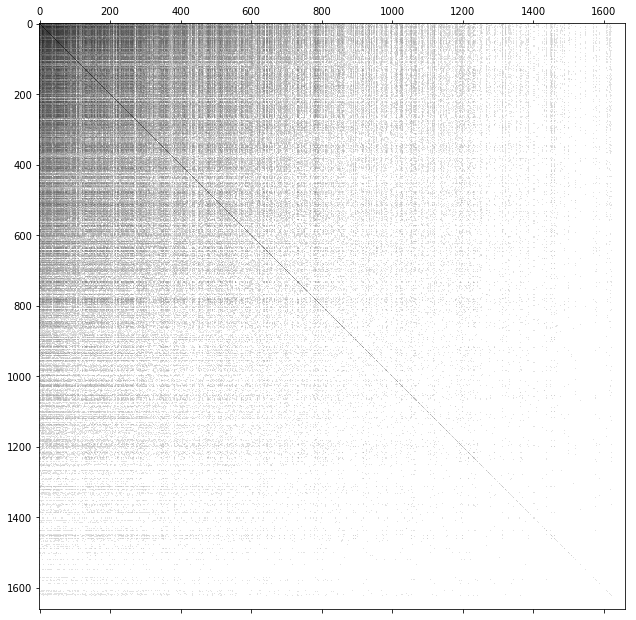

In [101]:
# better plot it in log scale!
plt.matshow(np.log(coMatrix_sorted[:,popular_indexing]+1), fignum=1000, cmap=plt.cm.binary)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

In [102]:
def co_occurrance_similarity(item_id,coocurrance, ntop=10):
    similarItems = coocurrance[item_id,:]
    mostSimilar = np.argsort(similarItems)[::-1]
    mostSimilar = mostSimilar[1:ntop+1]
    
    return np.dstack((mostSimilar, similarItems[mostSimilar]))[0]

In [111]:
queryMovieId = 100
Ntop= 5
print('For item "%s" top-%s recommendations are: ' % (unique_item_dict[queryMovieId], Ntop))


For item "Heavy Metal (1981)" top-5 recommendations are: 


In [112]:

similarItems = co_occurrance_similarity(queryMovieId, coMatrix, Ntop)


In [113]:
for r in similarItems:
    print(unique_item_dict[r[0]],r[1])

Star Wars (1977) 29.0
Princess Bride, The (1987) 26.0
Empire Strikes Back, The (1980) 26.0
Raiders of the Lost Ark (1981) 26.0
Alien (1979) 26.0


Las pelis que mas ha visto la gente, no las mejores. Es muy malo. Jaccard penaliza esto mas, es mejor. Es un item 2 item recommender

## Memory-based computing Collaborative Filtering (CF)

We have two types:
- item-item, I see what has one user has rated to other items j, and I predict what she will rate to my new item i. It's like calculating correlation between items i and j. If  dont have many j items the new prediction would be not very good.
- user-user: we find correlation between users and see what other similar users rated. This is better, more open to exploration.


## MODEL- BASED CF or LATENT FACTOR MODELS

Manifold - look

Look t-sne, isomap, als 

## Recommendations by content - look

Paper item2vec - mirar word2vec